## Word2Vec

In [1]:
#importing necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import spacy

## 1. Try a real corpus

In [2]:
corpus = "Born and raised in Atchison, Kansas, and later in Des Moines, Iowa, Earhart developed a passion for adventure at a young age, steadily gaining flying experience from her twenties. In 1928, Earhart became the first female passenger to cross the Atlantic by airplane (accompanying pilot Wilmer Stultz), for which she achieved celebrity status. In 1932, piloting a Lockheed Vega 5B, Earhart made a nonstop solo transatlantic flight, becoming the first woman to achieve such a feat. She received the United States Distinguished Flying Cross for this accomplishment. In 1935, Earhart became a visiting faculty member at Purdue University as an advisor to aeronautical engineering and a career counselor to female students. She was also a member of the National Woman's Party and an early supporter of the Equal Rights Amendment. Known as one of the most inspirational American figures in aviation from the late 1920s throughout the 1930s, Earhart's legacy is often compared to the early aeronautical career of pioneer aviator Charles Lindbergh, as well as to figures like First Lady Eleanor Roosevelt for their close friendship and lasting impact on the issue of women's causes from that period."

In [3]:
#let's check the size of the corpus
print(len(corpus))


1190


In [5]:


convert = spacy.load("en_core_web_lg")
#converting to lower case
corpus_lower = convert(corpus.lower())

print(corpus_lower)

born and raised in atchison, kansas, and later in des moines, iowa, earhart developed a passion for adventure at a young age, steadily gaining flying experience from her twenties. in 1928, earhart became the first female passenger to cross the atlantic by airplane (accompanying pilot wilmer stultz), for which she achieved celebrity status. in 1932, piloting a lockheed vega 5b, earhart made a nonstop solo transatlantic flight, becoming the first woman to achieve such a feat. she received the united states distinguished flying cross for this accomplishment. in 1935, earhart became a visiting faculty member at purdue university as an advisor to aeronautical engineering and a career counselor to female students. she was also a member of the national woman's party and an early supporter of the equal rights amendment. known as one of the most inspirational american figures in aviation from the late 1920s throughout the 1930s, earhart's legacy is often compared to the early aeronautical caree

In [7]:
#making a list of words
word_list = []
for word in corpus_lower:
        word_list.append('' + word.text + '')

word_list[0:5]


['born', 'and', 'raised', 'in', 'atchison']

In [9]:
#1. tokenize
#usually you use spaCy / NLTK to tokenize (but we gonna do this later on, we gonna have spaCy)
corpus_tokenized = []
empty = []
counter = 0
for word in word_list:
    if counter == 10:
        corpus_tokenized.append(empty)
        counter = 0
        empty = []
    empty.append(word)
    counter = counter + 1

corpus_tokenized[0:5]

[['born',
  'and',
  'raised',
  'in',
  'atchison',
  ',',
  'kansas',
  ',',
  'and',
  'later'],
 ['in',
  'des',
  'moines',
  ',',
  'iowa',
  ',',
  'earhart',
  'developed',
  'a',
  'passion'],
 ['for',
  'adventure',
  'at',
  'a',
  'young',
  'age',
  ',',
  'steadily',
  'gaining',
  'flying'],
 ['experience',
  'from',
  'her',
  'twenties',
  '.',
  'in',
  '1928',
  ',',
  'earhart',
  'became'],
 ['the',
  'first',
  'female',
  'passenger',
  'to',
  'cross',
  'the',
  'atlantic',
  'by',
  'airplane']]

In [12]:
#2. numericalize

#2.1 get all the unique words
#we want to flatten this (basically merge all list)
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))  #vocabs is a term defining all unique words your system know
print(vocabs[0:5])
print(len(vocabs))

['well', 'kansas', 'vega', '1932', 'such']
129


In [13]:
#2.2 assign id to all these vocabs
word2index = {v: idx+1 for idx, v in enumerate(vocabs)}

#add <UNK>, which is a very normal token exists in the world
vocabs.append('<UNK>') #chaky, can it be ##UNK, or UNKKKKKK, or anything

word2index['<UNK>'] = 0 

In [14]:
word2index

{'well': 1,
 'kansas': 2,
 'vega': 3,
 '1932': 4,
 'such': 5,
 'amendment': 6,
 'young': 7,
 'figures': 8,
 'achieve': 9,
 'first': 10,
 'becoming': 11,
 'a': 12,
 'compared': 13,
 'counselor': 14,
 'pilot': 15,
 'equal': 16,
 'made': 17,
 'purdue': 18,
 'steadily': 19,
 'career': 20,
 'earhart': 21,
 'eleanor': 22,
 'female': 23,
 'party': 24,
 'legacy': 25,
 '.': 26,
 'gaining': 27,
 'flying': 28,
 'one': 29,
 'by': 30,
 "'s": 31,
 'feat': 32,
 'stultz': 33,
 'received': 34,
 'engineering': 35,
 'is': 36,
 'as': 37,
 'later': 38,
 'moines': 39,
 'achieved': 40,
 'flight': 41,
 'nonstop': 42,
 'also': 43,
 ')': 44,
 'passion': 45,
 'american': 46,
 'causes': 47,
 'at': 48,
 'advisor': 49,
 'the': 50,
 'pioneer': 51,
 'late': 52,
 'impact': 53,
 'and': 54,
 'women': 55,
 '1920s': 56,
 '(': 57,
 'aviation': 58,
 'roosevelt': 59,
 '1928': 60,
 'lady': 61,
 'became': 62,
 ',': 63,
 'known': 64,
 'twenties': 65,
 'she': 66,
 'supporter': 67,
 'piloting': 68,
 'often': 69,
 'passenger': 70,

In [15]:
#create index2word dictionary
   
index2word = {v:k for k, v in word2index.items()}

index2word

{1: 'well',
 2: 'kansas',
 3: 'vega',
 4: '1932',
 5: 'such',
 6: 'amendment',
 7: 'young',
 8: 'figures',
 9: 'achieve',
 10: 'first',
 11: 'becoming',
 12: 'a',
 13: 'compared',
 14: 'counselor',
 15: 'pilot',
 16: 'equal',
 17: 'made',
 18: 'purdue',
 19: 'steadily',
 20: 'career',
 21: 'earhart',
 22: 'eleanor',
 23: 'female',
 24: 'party',
 25: 'legacy',
 26: '.',
 27: 'gaining',
 28: 'flying',
 29: 'one',
 30: 'by',
 31: "'s",
 32: 'feat',
 33: 'stultz',
 34: 'received',
 35: 'engineering',
 36: 'is',
 37: 'as',
 38: 'later',
 39: 'moines',
 40: 'achieved',
 41: 'flight',
 42: 'nonstop',
 43: 'also',
 44: ')',
 45: 'passion',
 46: 'american',
 47: 'causes',
 48: 'at',
 49: 'advisor',
 50: 'the',
 51: 'pioneer',
 52: 'late',
 53: 'impact',
 54: 'and',
 55: 'women',
 56: '1920s',
 57: '(',
 58: 'aviation',
 59: 'roosevelt',
 60: '1928',
 61: 'lady',
 62: 'became',
 63: ',',
 64: 'known',
 65: 'twenties',
 66: 'she',
 67: 'supporter',
 68: 'piloting',
 69: 'often',
 70: 'passenger',

In [16]:
vocabs  #checking vocab

['well',
 'kansas',
 'vega',
 '1932',
 'such',
 'amendment',
 'young',
 'figures',
 'achieve',
 'first',
 'becoming',
 'a',
 'compared',
 'counselor',
 'pilot',
 'equal',
 'made',
 'purdue',
 'steadily',
 'career',
 'earhart',
 'eleanor',
 'female',
 'party',
 'legacy',
 '.',
 'gaining',
 'flying',
 'one',
 'by',
 "'s",
 'feat',
 'stultz',
 'received',
 'engineering',
 'is',
 'as',
 'later',
 'moines',
 'achieved',
 'flight',
 'nonstop',
 'also',
 ')',
 'passion',
 'american',
 'causes',
 'at',
 'advisor',
 'the',
 'pioneer',
 'late',
 'impact',
 'and',
 'women',
 '1920s',
 '(',
 'aviation',
 'roosevelt',
 '1928',
 'lady',
 'became',
 ',',
 'known',
 'twenties',
 'she',
 'supporter',
 'piloting',
 'often',
 'passenger',
 '1930s',
 'in',
 'transatlantic',
 'friendship',
 'an',
 '5b',
 'university',
 'wilmer',
 'issue',
 'accomplishment',
 'like',
 'born',
 'member',
 'was',
 'developed',
 'raised',
 'united',
 'aviator',
 'most',
 'their',
 'on',
 'inspirational',
 'throughout',
 'right

## 2. Prepare train data


In [20]:
def random_batch(batch_size, corpus, win_size):

    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        for i in range(win_size, len(sent) - win_size): 
            center_word = word2index[sent[i]]
            for j in range(1,win_size+1):
                outside_words = [word2index[sent[i-j]], word2index[sent[i+j]]]  
                for o in outside_words:
                    skipgrams.append([center_word, o])
                
   
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [ ]:
batch_size  = 2 
win_size = 2

input_batch, target_batch = random_batch(batch_size, corpus_tokenized, win_size)

print("Input: ", input_batch.shape)
print("Target: ", target_batch.shape)

## 3. Model

In [18]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [22]:
voc_size = len(vocabs)
voc_size

130

In [ ]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [19]:
#preparing all_vocabs

batch_size = 2
voc_size = len(vocabs)

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 130])

In [23]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [27]:
voc_size = len(vocabs)
batch_size     = 2# mini-batch size
embedding_size = 2 #so we can later plot
window_size=2
model  = Skipgram(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
import time

# Training
start_train_time = time.time()
num_epochs = 10000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch(batch_size, corpus_tokenized, window_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        

Epoch: 1000 | cost: 4.394658 | time: 0m 2s
Epoch: 2000 | cost: 4.799616 | time: 0m 6s
Epoch: 3000 | cost: 4.977057 | time: 0m 9s
Epoch: 4000 | cost: 5.014775 | time: 0m 12s
Epoch: 5000 | cost: 5.044192 | time: 0m 17s
Epoch: 6000 | cost: 4.845207 | time: 0m 20s
Epoch: 7000 | cost: 4.874094 | time: 0m 25s
Epoch: 8000 | cost: 4.328227 | time: 0m 28s
Epoch: 9000 | cost: 4.988227 | time: 0m 31s
Epoch: 10000 | cost: 3.733369 | time: 0m 36s


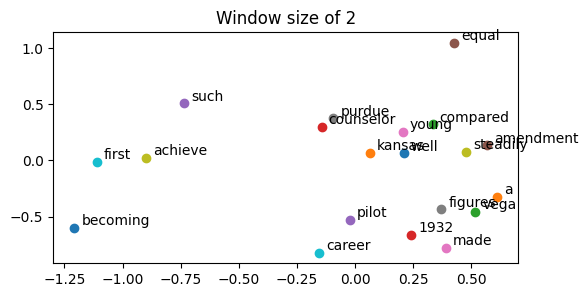

In [28]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_center_word(id_tensor)
    u_embed = model.embedding_outside_word(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Window size of 2')
plt.show()

CBOW...yaaa

In [29]:
def random_batch_for_cbow(batch_size, word_sequence, window_size=1):

    cbow = []

    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1): 
            target = word2index[sent[i]]
            context = []
            
            for j in range(window_size):
                
                if i - (j + 1) >= 0: 
                    context.append(word2index[sent[i - (j + 1)]])
                
                if i + (j + 1) < len(sent): 
                    context.append(word2index[sent[i + (j + 1)]])
            for w in context:
                cbow.append([context, target])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False) #randomly pick without replacement
    
    for i in random_index:
        random_inputs.append(cbow[i][0])  # Context word that we want as input
        random_labels.append([cbow[i][1]])  # Target word that we want as label
    
    return np.array(random_inputs), np.array(random_labels)

In [30]:
class Cbow(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Cbow, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [31]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Cbow(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
import time
num_epochs = 10000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_for_cbow(batch_size, corpus_tokenized)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}")

Epoch: 1000 | cost: 5.053758 | time: 0m 1
Epoch: 2000 | cost: 4.658739 | time: 0m 3
Epoch: 3000 | cost: 5.300117 | time: 0m 6
Epoch: 4000 | cost: 4.844223 | time: 0m 9
Epoch: 5000 | cost: 4.554654 | time: 0m 12
Epoch: 6000 | cost: 4.606877 | time: 0m 14
Epoch: 7000 | cost: 4.571799 | time: 0m 17
Epoch: 8000 | cost: 4.385777 | time: 0m 20
Epoch: 9000 | cost: 3.369804 | time: 0m 23
Epoch: 10000 | cost: 4.139610 | time: 0m 26


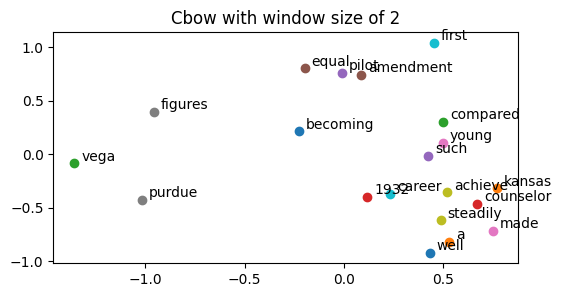

In [35]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Cbow with window size of 2')
plt.show()

**Negative Sampling** Finally!!! i reach here

In [42]:
import random


def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [36]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [38]:
from collections import Counter
Z = 0.001
word_count = Counter(flatten(corpus_tokenized))
num_total_words = sum([c for w, c in word_count.items()])

unigram_table = []

for vo in vocabs:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [39]:
Counter(unigram_table)

Counter({'well': 18,
         'kansas': 18,
         'vega': 18,
         '1932': 18,
         'such': 18,
         'amendment': 18,
         'young': 18,
         'figures': 30,
         'achieve': 18,
         'first': 41,
         'becoming': 18,
         'a': 86,
         'compared': 18,
         'counselor': 18,
         'pilot': 18,
         'equal': 18,
         'made': 18,
         'purdue': 18,
         'steadily': 18,
         'career': 30,
         'earhart': 60,
         'eleanor': 18,
         'female': 30,
         'party': 18,
         'legacy': 18,
         '.': 69,
         'gaining': 18,
         'flying': 30,
         'one': 18,
         'by': 18,
         "'s": 41,
         'feat': 18,
         'stultz': 18,
         'received': 18,
         'engineering': 18,
         'is': 18,
         'as': 51,
         'later': 18,
         'moines': 18,
         'achieved': 18,
         'flight': 18,
         'nonstop': 18,
         'also': 18,
         ')': 18,
         'passi

In [43]:
num_neg = 5
negative_sampling(target_batch, unigram_table, num_neg)


tensor([[ 62,  54,  58,  63,  86],
        [ 50,  30,  50,  63, 108]])

In [44]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, center_words, outside_words, negative_words):
        #center_words, outside_words: (batch_size, 1)
        #negative_words:  (batch_size, k)
        
        center_embed  = self.embedding_center_word(center_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

In [45]:
batch_size     = 2 
embedding_size = 2 
model          = SkipgramNeg(voc_size, embedding_size)
num_neg        = 10 

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
import time

start_train_time = time.time()

# Training
num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus, 2)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 2.249995 | time: 0m 0s
Epoch: 2000 | cost: 1.351819 | time: 0m 0s
Epoch: 3000 | cost: 1.665393 | time: 0m 0s
Epoch: 4000 | cost: 1.076448 | time: 0m 0s
Epoch: 5000 | cost: 1.294886 | time: 0m 0s
Epoch: 6000 | cost: 2.520634 | time: 0m 0s
Epoch: 7000 | cost: 1.512875 | time: 0m 0s
Epoch: 8000 | cost: 0.739349 | time: 0m 0s
Epoch: 9000 | cost: 0.964600 | time: 0m 0s
Epoch: 10000 | cost: 0.865251 | time: 0m 0s


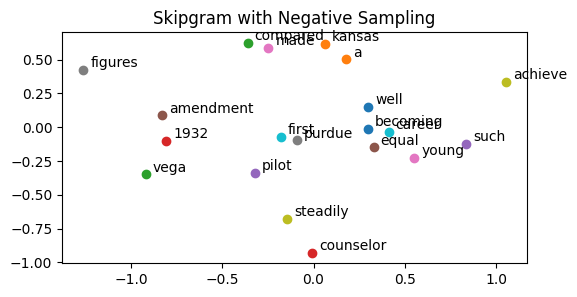

In [49]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Skipgram with Negative Sampling')
plt.show()